<a href="https://colab.research.google.com/github/connor-verheyen/COVID19_IndoorRH/blob/main/supplementary_analysis/Supplementary_Section_08__Full_Analysis_With_Cases_And_Global_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import scipy as sp 
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import matplotlib.dates as md

In [ ]:
# For a specific version of seaborn package 
!pip install seaborn==0.10.1

In [ ]:
# # To use Basemap 
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
# # For a specific version of pyproject 
# !pip install pyproj==1.9.6

In [ ]:
# Set seaborn plotting style 
sns.set(context='talk', font_scale=0.9, style='ticks', palette='Blues_d')

In [ ]:
# Import Files 
filename='https://raw.githubusercontent.com/connor-verheyen/COVID19_IndoorRH/main/data/7DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.csv'

df7all = pd.read_csv(filename) #df7all = pd.read_excel('7DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.xlsx')

# Drop unnecessary index columns 
df7all.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa
upper_lat_bound = 23.5; lower_lat_bound = -23.5 

df7all['Date']=pd.to_datetime(df7all['Date'])

n_hem = df7all[df7all['Lat']>upper_lat_bound]; s_hem = df7all[df7all['Lat']<lower_lat_bound]; trop  = df7all[(df7all['Lat']<upper_lat_bound) & (df7all['Lat']>lower_lat_bound)]

print('Total Country Count:',df7all['Country'].unique().shape[0])
print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
print('Tropics Country Count:',trop['Country'].unique().shape[0])

Total Country Count: 121
Northern Hemisphere Country Count: 67
Southern Hemisphere Country Count: 4
Tropics Country Count: 50


In [ ]:
# Assign the region name to each country in the dataset 
# df.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else # assigned n_hem if its in the list of northern hemisphere countries 
#                       's_hem' if country_name in s_hem['Country'].unique() else # assigned s_hem if its in the list of southern hemisphere countries 
#                       'trop' # assigned tropical if its neigher northern or southern hemisphere 
#                       for country_name in df.loc[:,'Country']]
df7all.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7all.loc[:,'Country']]

In [ ]:
# from mpl_toolkits.basemap import Basemap

In [ ]:
# from itertools import chain

# def draw_map(m, scale=0.2):
#     # draw a shaded-relief image
#     m.shadedrelief(scale=scale)
    
#     # lats and longs are returned as a dictionary
#     lats = m.drawparallels(np.linspace(-90, 90, 13))
#     lons = m.drawmeridians(np.linspace(-180, 180, 13))

#     # keys contain the plt.Line2D instances
#     lat_lines = chain(*(tup[1][0] for tup in lats.items()))
#     lon_lines = chain(*(tup[1][0] for tup in lons.items()))
#     all_lines = chain(lat_lines, lon_lines)
    
#     # cycle through these lines and set the desired style
#     for line in all_lines:
#         line.set(linestyle='-', alpha=0.2, color='w')

In [ ]:
# fig = plt.figure(figsize=(18, 10), edgecolor='w')

# # Plot the world map 
# m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=-60, urcrnrlat=75,
#             llcrnrlon=-130, urcrnrlon=160, )
# draw_map(m)

# # Plot the Tropics 
# m.plot(x=[-130,160],y=[23.5,23.5],linewidth=2,linestyle='--',alpha=0.5)
# m.plot(x=[-130,160],y=[-23.5,-23.5],linewidth=2,linestyle='--',alpha=0.5)

# # Plot the country latitude and longitude values 
# m.scatter(y=n_hem['Lat'].unique(), x=n_hem['Long'].unique(), latlon=True, c=sns.color_palette(palette='Blues_d',n_colors=4)[1], s=400, alpha=0.6,label='N. Hem')
# m.scatter(y=s_hem['Lat'].unique(), x=s_hem['Long'].unique(), latlon=True, c=sns.color_palette(palette='Reds_d',n_colors=4)[2], s=400, alpha=0.6,label='S. Hem')
# m.scatter(y=trop['Lat'].unique(), x=trop['Long'].unique(), latlon=True, c=sns.color_palette(palette='Greens_d',n_colors=4)[1], s=400, alpha=0.6,label='Trop')

# plt.legend(loc='lower left')
# plt.show()

In [ ]:
print('There are',df7all.Country.unique().shape[0],'countries in total in the final dataset')
print('The countries in the dataset account for approximately',round(df7all['population'].dropna().unique().sum()/(7.8e9)*100,1),'percent of the total global population\n')

print('There are',df7all[df7all['Lat'].ge(0)].Country.unique().shape[0],'countries above the equator')
print('There are',df7all[df7all['Lat'].le(0)].Country.unique().shape[0],'countries below the equator\n')

print('Approximately',round(df7all[df7all['Lat'].ge(0)]['population'].dropna().unique().sum()/df7all['population'].dropna().unique().sum()*100,1),'percent of the population in the dataset lives above the equator')
print('Approximately',round(df7all[df7all['Lat'].le(0)]['population'].dropna().unique().sum()/df7all['population'].dropna().unique().sum()*100,1),'percent of the population in the dataset lives above the equator\n')


print('There are',n_hem.Country.unique().shape[0],'countries in the Northern Hemisphere')
print('There are',s_hem.Country.unique().shape[0],'countries in the Southern Hemisphere')
print('There are',trop.Country.unique().shape[0],'countries in the Tropics\n')

print('Approximately',round(n_hem['population'].dropna().unique().sum()/df7all['population'].dropna().unique().sum()*100,1),'percent of the population in the dataset lives in the Northern Hemisphere')
print('Approximately',round(s_hem['population'].dropna().unique().sum()/df7all['population'].dropna().unique().sum()*100,1),'percent of the population in the dataset lives in the Southern Hemisphere')
print('Approximately',round(trop['population'].dropna().unique().sum()/df7all['population'].dropna().unique().sum()*100,1),'percent of the population in the dataset lives in the Tropics\n')


There are 121 countries in total in the final dataset
The countries in the dataset account for approximately 92.6 percent of the total global population

There are 103 countries above the equator
There are 18 countries below the equator

Approximately 86.7 percent of the population in the dataset lives above the equator
Approximately 13.3 percent of the population in the dataset lives above the equator

There are 67 countries in the Northern Hemisphere
There are 4 countries in the Southern Hemisphere
There are 50 countries in the Tropics

Approximately 53.6 percent of the population in the dataset lives in the Northern Hemisphere
Approximately 2.1 percent of the population in the dataset lives in the Southern Hemisphere
Approximately 44.3 percent of the population in the dataset lives in the Tropics



In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

In [ ]:
# Make dataframe with outbreak metrics and lagged versions of indoor climate 
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

df7all_lag_indrh = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

In [ ]:
# Function for changing seaborn barplot width 

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

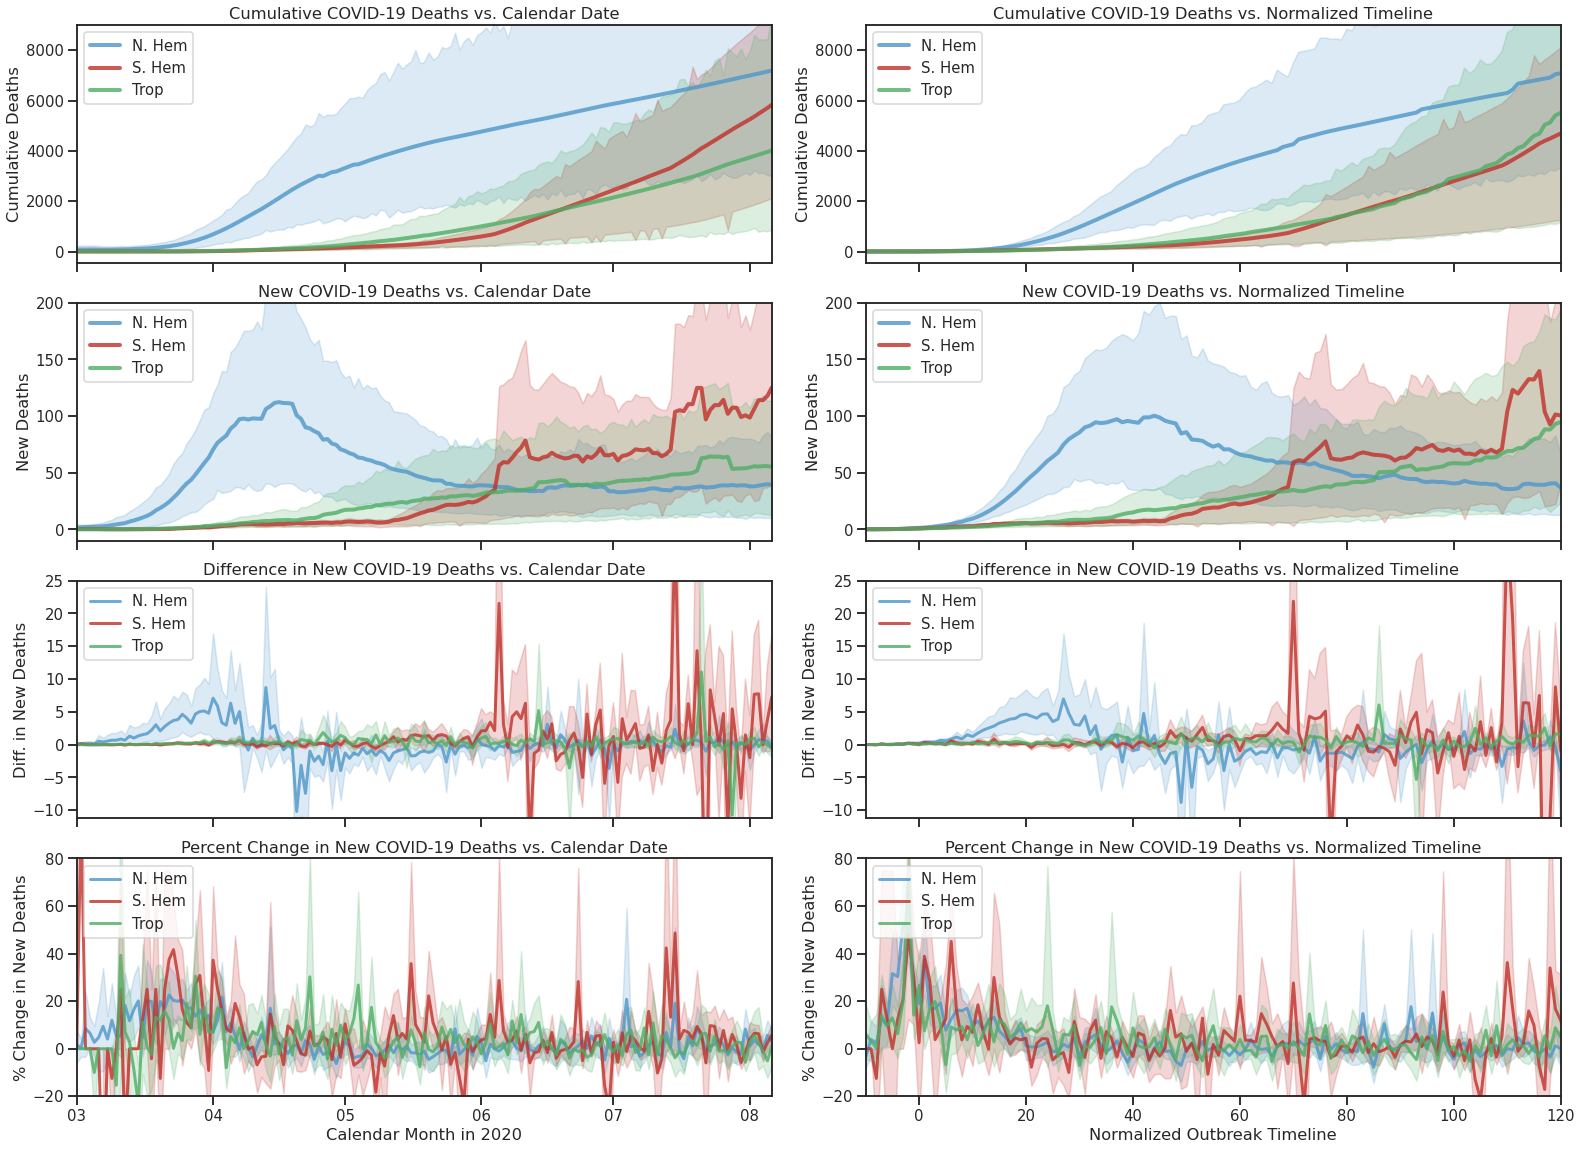

In [ ]:
# Timeseries plots of total deaths -> broken apart and labeled by region 

import datetime
import matplotlib.dates as md

# Initialize figure
fig,ax = plt.subplots(4,2,figsize=(22,16),sharex='col')

# Total Deaths  
sns.lineplot(x='Date',y='total_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Date',y='total_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Date',y='total_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='total_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[0,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='total_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[0,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='total_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[0,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

ax[0,0].set_title('Cumulative COVID-19 Deaths vs. Calendar Date'); ax[0,1].set_title('Cumulative COVID-19 Deaths vs. Normalized Timeline')
ax[0,0].set_ylim(-9000*0.05,9000); ax[0,1].set_ylim(-9000*0.05,9000); 
[ax[0,c].set_ylabel('Cumulative Deaths') for c in np.arange(0,2)]


# New Deaths  
sns.lineplot(x='Date',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[1,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Date',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[1,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Date',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[1,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='n_hem'],ax=ax[1,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='s_hem'],ax=ax[1,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=4,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths',data=df7all[df7all['Region']=='trop'],ax=ax[1,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=4,alpha=0.8)

ax[1,0].set_title('New COVID-19 Deaths vs. Calendar Date'); ax[1,1].set_title('New COVID-19 Deaths vs. Normalized Timeline')
ax[1,0].set_ylim(-200*0.05,200); ax[1,1].set_ylim(-200*0.05,200); 
[ax[1,c].set_ylabel('New Deaths') for c in np.arange(0,2)]


# New Deaths Difference 
sns.lineplot(x='Date',y='new_deaths_diff',data=df7all[df7all['Region']=='n_hem'],ax=ax[2,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
sns.lineplot(x='Date',y='new_deaths_diff',data=df7all[df7all['Region']=='s_hem'],ax=ax[2,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
sns.lineplot(x='Date',y='new_deaths_diff',data=df7all[df7all['Region']=='trop'],ax=ax[2,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='n_hem'],ax=ax[2,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='s_hem'],ax=ax[2,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_diff',data=df7all[df7all['Region']=='trop'],ax=ax[2,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)

ax[2,0].set_title('Difference in New COVID-19 Deaths vs. Calendar Date'); ax[2,1].set_title('Difference in New COVID-19 Deaths vs. Normalized Timeline')
ax[2,0].set_ylim(-25*0.45,25); ax[2,1].set_ylim(-25*0.45,25); 
[ax[2,c].set_ylabel('Diff. in New Deaths') for c in np.arange(0,2)]


# New Deaths Percent Change  
sns.lineplot(x='Date',y='new_deaths_pctchange',data=df7all[df7all['Region']=='n_hem'],ax=ax[3,0],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
sns.lineplot(x='Date',y='new_deaths_pctchange',data=df7all[df7all['Region']=='s_hem'],ax=ax[3,0],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
sns.lineplot(x='Date',y='new_deaths_pctchange',data=df7all[df7all['Region']=='trop'],ax=ax[3,0],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)

sns.lineplot(x='Days From 5th Death',y='new_deaths_pctchange',data=df7all[df7all['Region']=='n_hem'],ax=ax[3,1],label='N. Hem',color=sns.color_palette(palette='Blues_d',n_colors=4)[1],linewidth=3,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_pctchange',data=df7all[df7all['Region']=='s_hem'],ax=ax[3,1],label='S. Hem',color=sns.color_palette(palette='Reds_d',n_colors=4)[2],linewidth=3,alpha=0.8)
sns.lineplot(x='Days From 5th Death',y='new_deaths_pctchange',data=df7all[df7all['Region']=='trop'],ax=ax[3,1],label='Trop',color=sns.color_palette(palette='Greens_d',n_colors=4)[1],linewidth=3,alpha=0.8)

ax[3,0].set_title('Percent Change in New COVID-19 Deaths vs. Calendar Date'); ax[3,1].set_title('Percent Change in New COVID-19 Deaths vs. Normalized Timeline')
ax[3,0].set_ylim(-80*0.25,80); ax[3,1].set_ylim(-80*0.25,80); 
[ax[3,c].set_ylabel('% Change in New Deaths') for c in np.arange(0,2)]


# Shared attributes 
[ax.legend(loc='upper left') for ax in plt.gcf().axes]
[ax[r,0].set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 8, 6)]) for r in np.arange(0,4)]
[ax[r,0].xaxis.set_major_formatter(md.DateFormatter('%m')) for r in np.arange(0,4)]
[ax[r,1].set_xlim(-10,120) for r in np.arange(0,4)]
ax[3,0].set_xlabel('Calendar Month in 2020'); ax[3,1].set_xlabel('Normalized Outbreak Timeline')

fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8)


In [ ]:
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

lagged_df7all = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

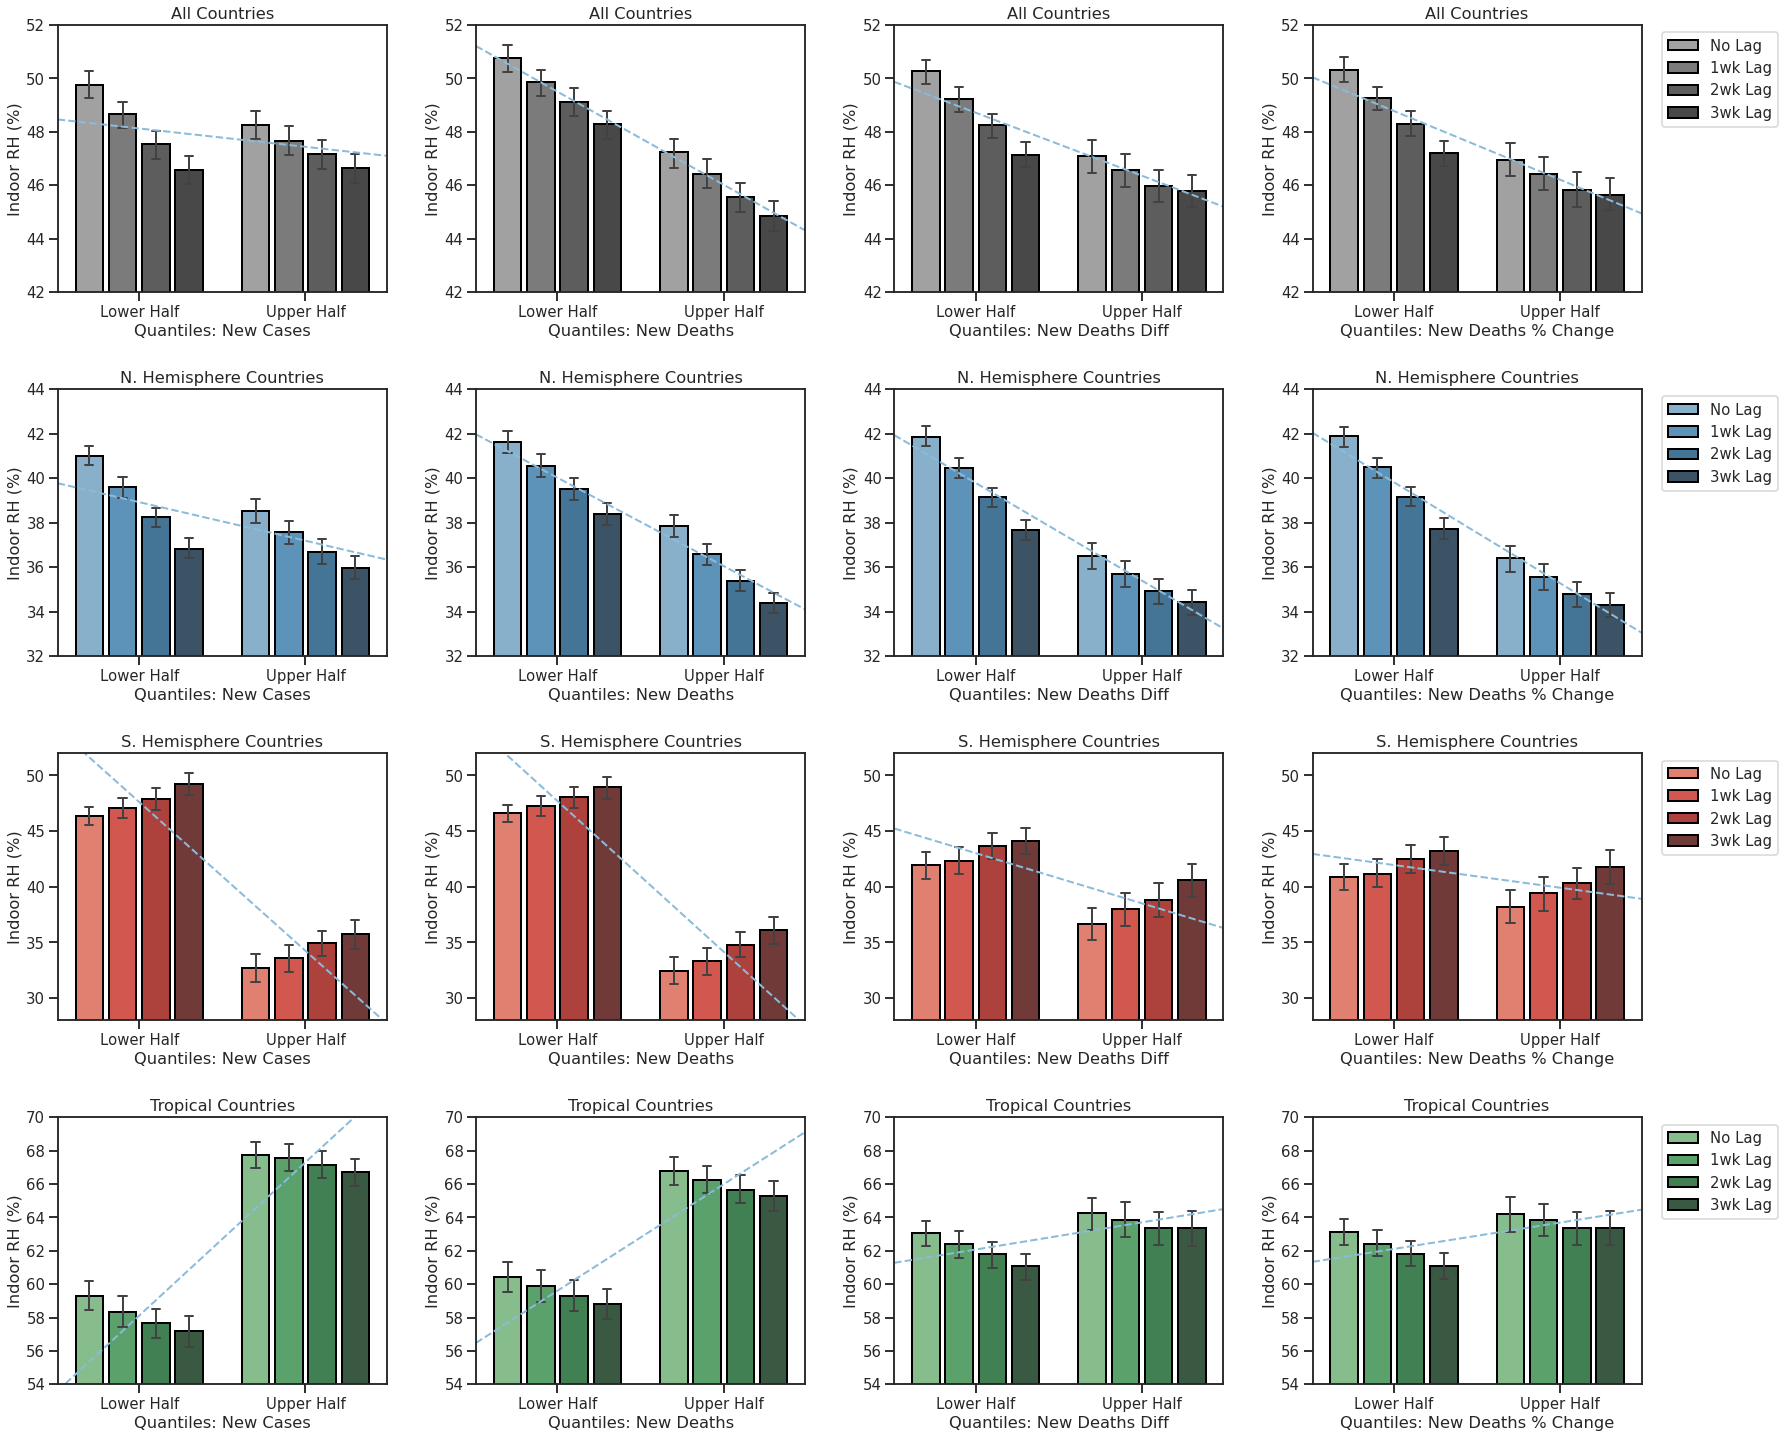

In [ ]:
first_day = 0; last_day = 120; qlevels = 2; # Parameters for quantizing the dataset 

qtotal = quantizer(dataframe=lagged_df7all, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False) # quantize all outbreaks
qnhem = quantizer(dataframe=lagged_df7all, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False) # quantize the N. Hem outbreaks 
qshem = quantizer(dataframe=lagged_df7all, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False) # quantize the S. Hem outbreaks 
qtrop = quantizer(dataframe=lagged_df7all, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False) # quantize the Trop outbreaks 


# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
rows = 4; cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(25,20))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # All countries colored bar plots and best fit 
  meltall = pd.melt(qtotal, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltall,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greys_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltall[quantized_outcomes[col]].cat.categories)),y=meltall.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Northern hemisphere colored bar plots and best fit 
  meltnhem = pd.melt(qnhem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltnhem,ax=ax[1,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Blues_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltnhem[quantized_outcomes[col]].cat.categories)),y=meltnhem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[1,col],truncate=False)

  # Southern hemisphere colored bar plots and best fit 
  meltshem = pd.melt(qshem, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=meltshem,ax=ax[2,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Reds_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(meltshem[quantized_outcomes[col]].cat.categories)),y=meltshem.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[2,col],truncate=False)

  # Tropical colored bar plots and best fit 
  melttrop = pd.melt(qtrop, id_vars=quantized_outcomes[col], value_vars=['IndoorRH_pct','IndoorRH_pct_lag7','IndoorRH_pct_lag14','IndoorRH_pct_lag21'])
  sns.barplot(x=quantized_outcomes[col], y='value', hue='variable', data=melttrop,ax=ax[3,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greens_d',n_colors=4))
  sns.regplot(x=np.arange(0,len(melttrop[quantized_outcomes[col]].cat.categories)),y=melttrop.groupby(quantized_outcomes[col])['value'].mean().values,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[3,col],truncate=False)

# Define custom plotting legends 
# Remove legends in the first 3 plots for all 3 rows 
[ax[r,c].get_legend().remove() for r in np.arange(0,4) for c in np.arange(0,3)] 
# Get handles and labels information for the legend, then use these same handles and specify custom label names and custom label location in the subsequent line
handles, labels = ax[0,3].get_legend_handles_labels(); ax[0,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[1,3].get_legend_handles_labels(); ax[1,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[2,3].get_legend_handles_labels(); ax[2,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[3,3].get_legend_handles_labels(); ax[3,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure

# Define xlabels 
[ax[r,0].set_xlabel('Quantiles: New Cases') for r in np.arange(0,4)]; [ax[r,1].set_xlabel('Quantiles: New Deaths') for r in np.arange(0,4)]
[ax[r,2].set_xlabel('Quantiles: New Deaths Diff') for r in np.arange(0,4)]; [ax[r,3].set_xlabel('Quantiles: New Deaths % Change') for r in np.arange(0,4)]

# Define ylabels 
[ax.set_ylabel('Indoor RH (%)') for ax in plt.gcf().axes]

# Define titles
[ax[0,c].set_title('All Countries') for c in np.arange(0,4)]
[ax[1,c].set_title('N. Hemisphere Countries') for c in np.arange(0,4)]
[ax[2,c].set_title('S. Hemisphere Countries') for c in np.arange(0,4)]
[ax[3,c].set_title('Tropical Countries') for c in np.arange(0,4)]

# Define ylims 
[ax[0,c].set_ylim(42,52) for c in np.arange(0,4)]
[ax[1,c].set_ylim(32,44) for c in np.arange(0,4)]
[ax[2,c].set_ylim(28,52) for c in np.arange(0,4)]
[ax[3,c].set_ylim(54,70) for c in np.arange(0,4)]
[ax.set_xticklabels(['Lower Half','Upper Half']) for ax in plt.gcf().axes]

[change_width(ax, 0.165) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=2,w_pad=1.5)

from google.colab import files
filename = ('Figure_OutbreakQuantiles_Barplots_All_NH_SH_Tr.png')
fig.savefig(filename, dpi=500)
files.download(filename) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

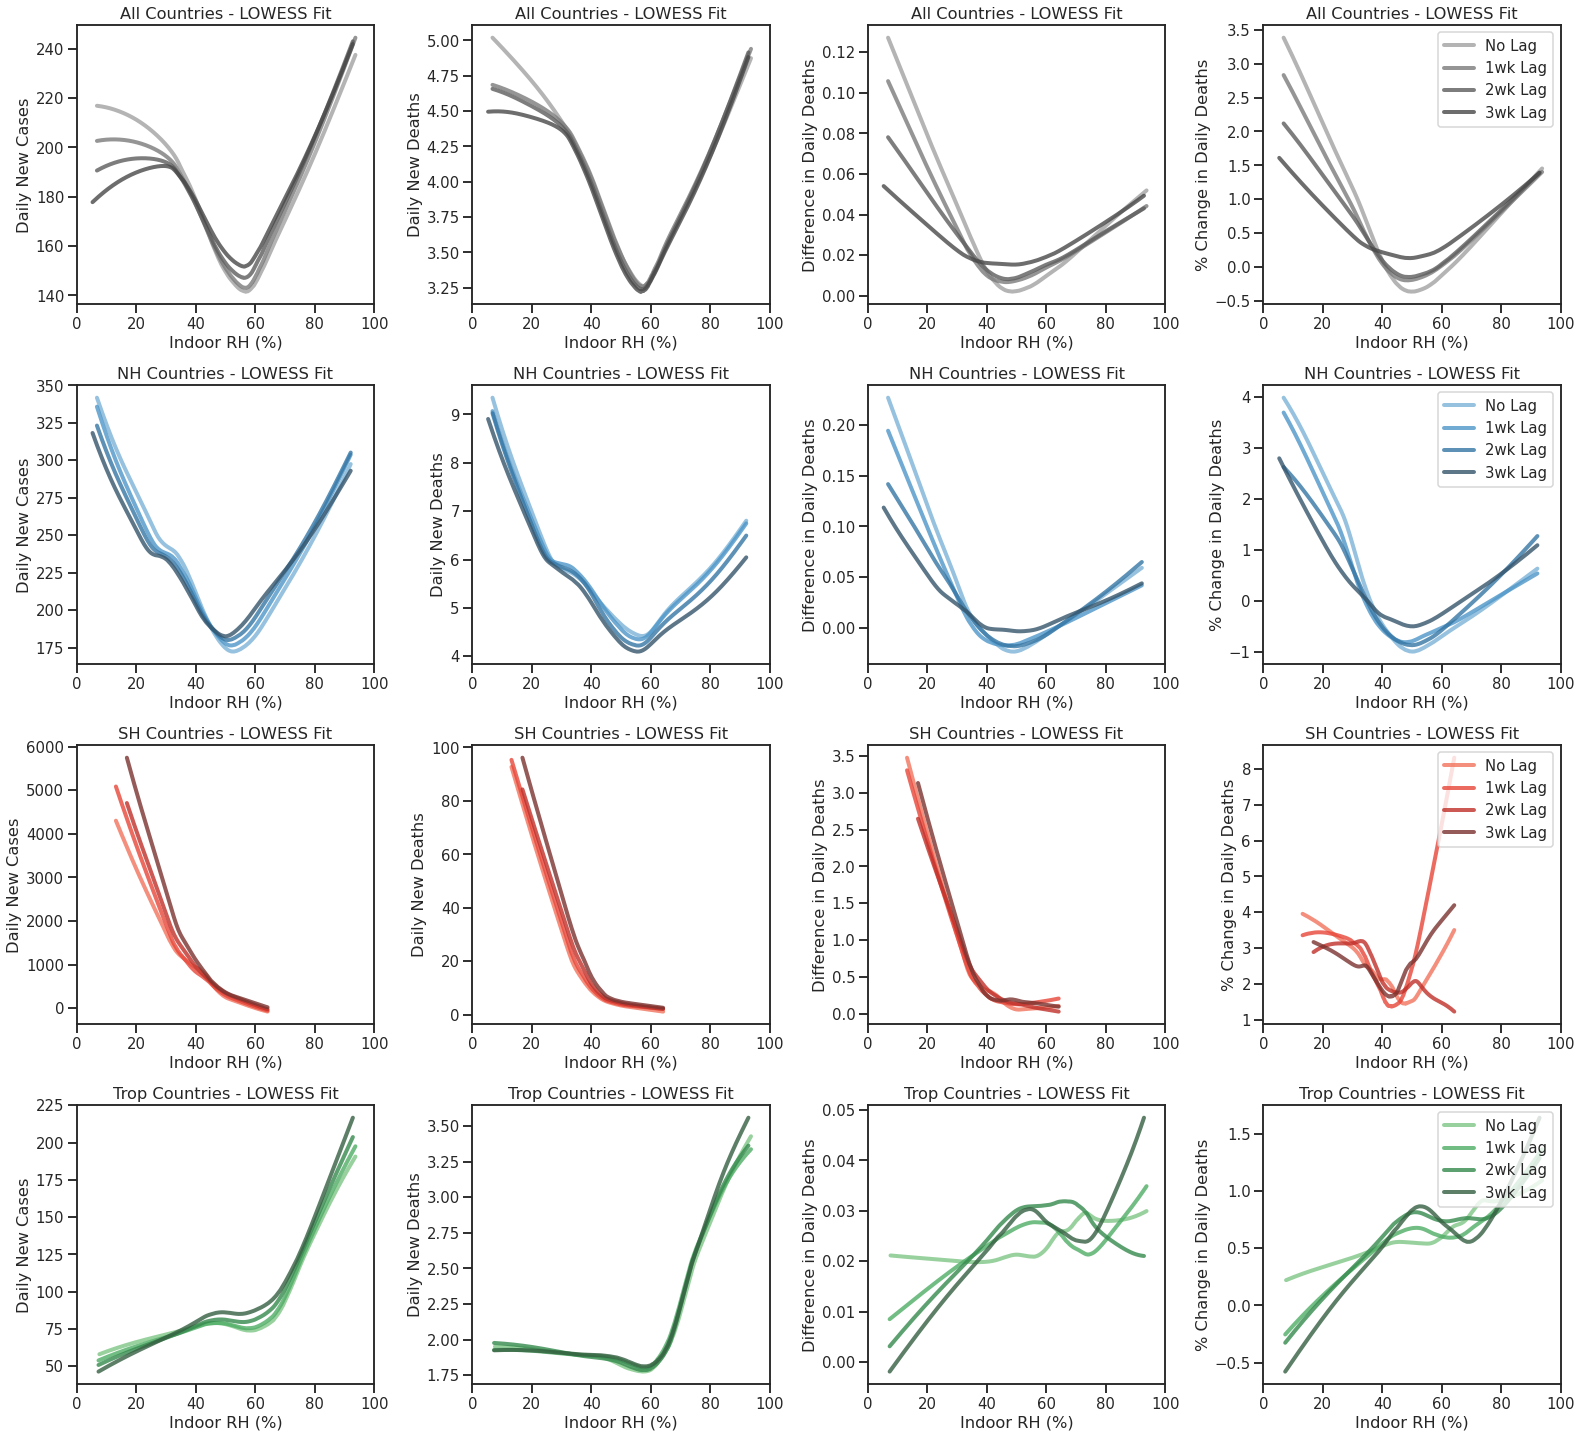

In [ ]:
all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120)] 
nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_cases','new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 4; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(22,20))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # LOWESS for all countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=all_forplot,ax=ax[0,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[3])

  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[2,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])

  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[3,col],lowess=True,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

#[ax.legend(loc='upper right') for ax in plt.gcf().axes]
[ax[r,3].legend(loc='upper right') for r in np.arange(0,4)]

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,3].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]

[ax[r,0].set_ylabel('Daily New Cases') for r in np.arange(0,4)]
[ax[r,1].set_ylabel('Daily New Deaths') for r in np.arange(0,4)]
[ax[r,2].set_ylabel('Difference in Daily Deaths') for r in np.arange(0,4)]
[ax[r,3].set_ylabel('% Change in Daily Deaths') for r in np.arange(0,4)]

ax[0,0].set_title('All Countries - LOWESS Fit')
ax[0,1].set_title('All Countries - LOWESS Fit')
ax[0,2].set_title('All Countries - LOWESS Fit')
ax[0,3].set_title('All Countries - LOWESS Fit')

ax[1,0].set_title('NH Countries - LOWESS Fit')
ax[1,1].set_title('NH Countries - LOWESS Fit')
ax[1,2].set_title('NH Countries - LOWESS Fit')
ax[1,3].set_title('NH Countries - LOWESS Fit')

ax[2,0].set_title('SH Countries - LOWESS Fit')
ax[2,1].set_title('SH Countries - LOWESS Fit')
ax[2,2].set_title('SH Countries - LOWESS Fit')
ax[2,3].set_title('SH Countries - LOWESS Fit')

ax[3,0].set_title('Trop Countries - LOWESS Fit')
ax[3,1].set_title('Trop Countries - LOWESS Fit')
ax[3,2].set_title('Trop Countries - LOWESS Fit')
ax[3,3].set_title('Trop Countries - LOWESS Fit')

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

from google.colab import files
filename = ('Figure_LOWESS_Fit_All_NH_SH_Trop.png')
fig.savefig(filename, dpi=500)
files.download(filename) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

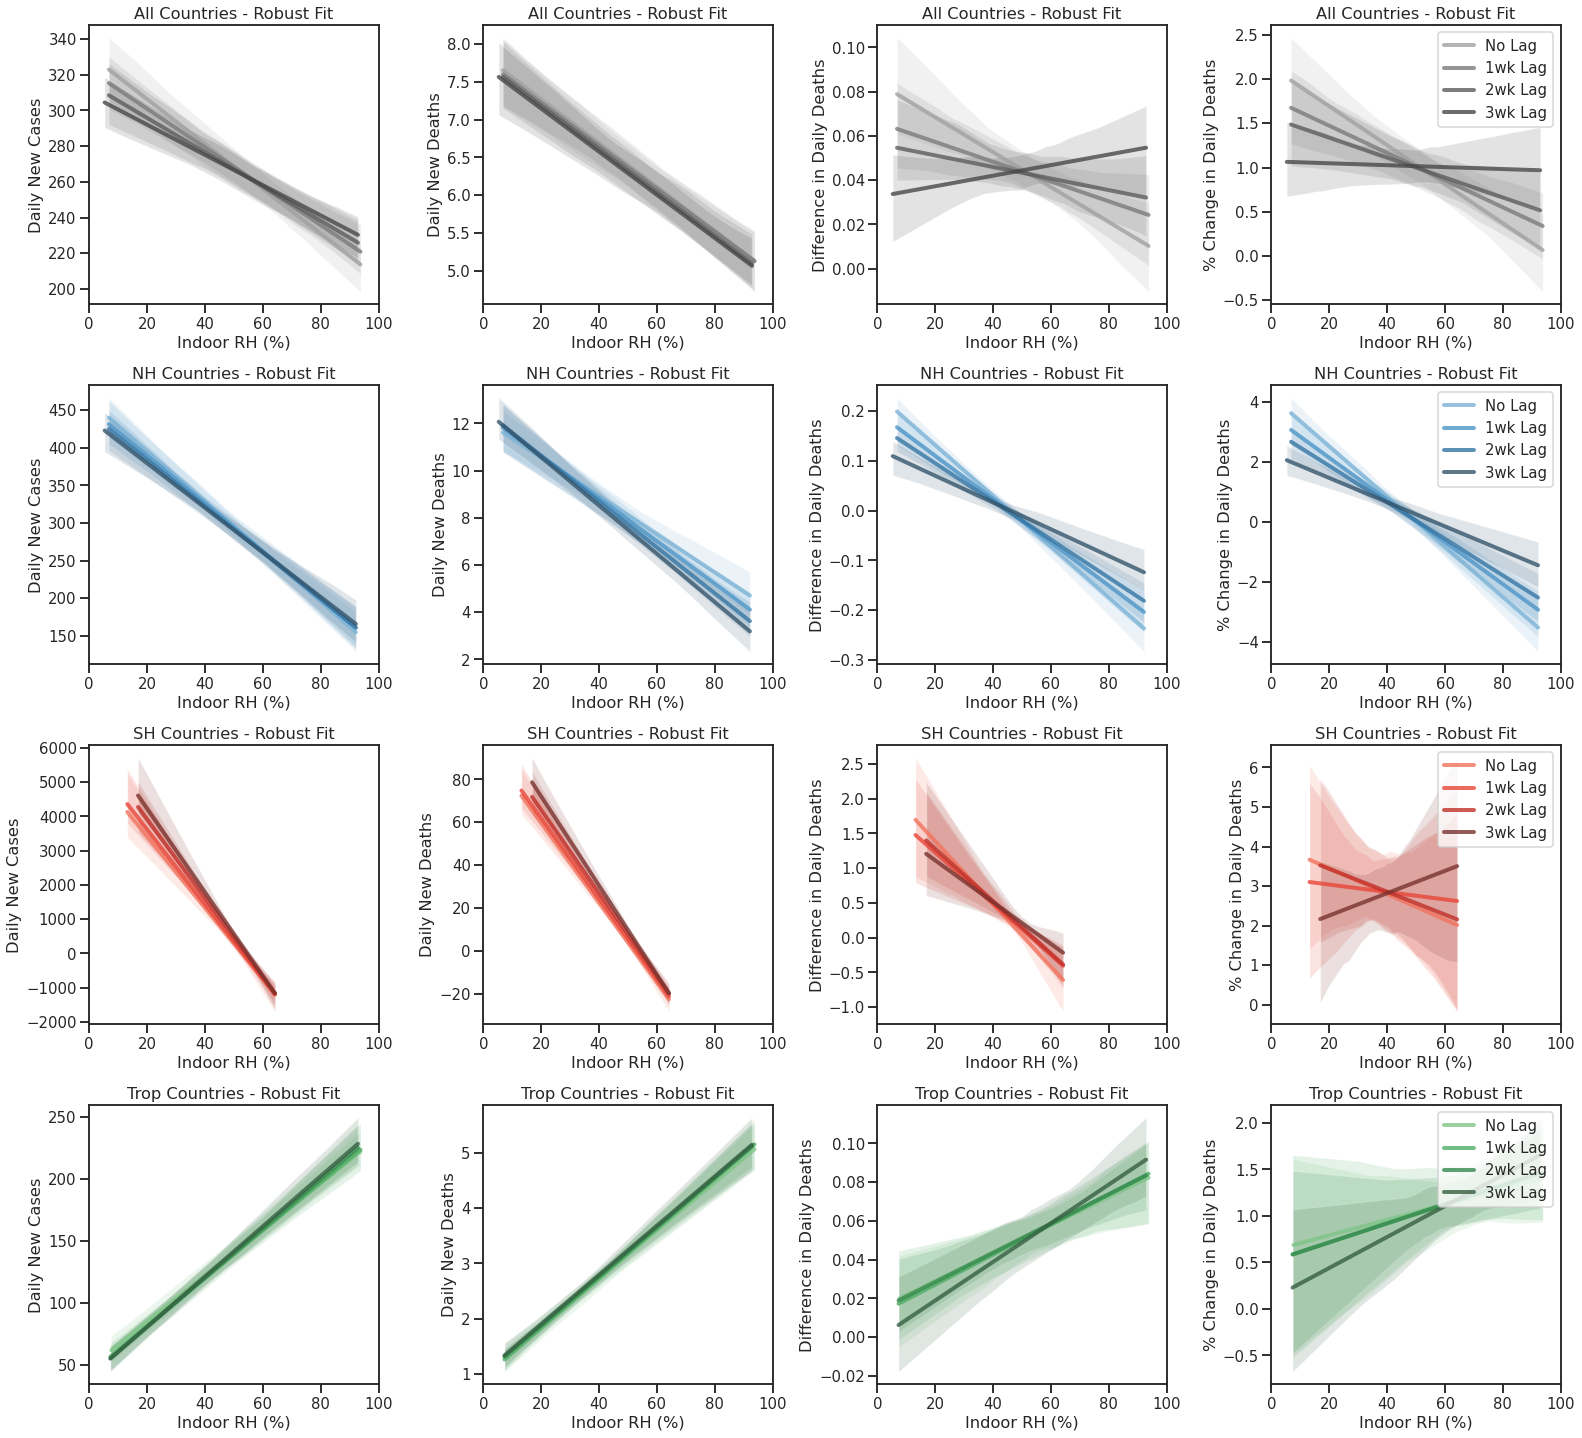

In [ ]:
all_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120)] 
nhem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(n_hem['Country'].unique()))]
shem_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(s_hem['Country'].unique()))]
trop_forplot = df7all_lag_indrh[(df7all_lag_indrh['Days From 5th Death']>=0) & (df7all_lag_indrh['Days From 5th Death']<=120) & (df7all_lag_indrh['Country'].isin(trop['Country'].unique()))]

outcomes = ['new_cases','new_deaths','new_deaths_diff','new_deaths_pctchange']
rows = 4; cols = len(outcomes); fig,ax=plt.subplots(rows,cols,figsize=(22,20))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 

  # LOWESS for all countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=all_forplot,ax=ax[0,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greys_d',n_colors=4)[3])

  # LOWESS for n hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=nhem_forplot,ax=ax[1,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Blues_d',n_colors=4)[3])

  # LOWESS for s hem countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=shem_forplot,ax=ax[2,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=shem_forplot,ax=ax[2,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=shem_forplot,ax=ax[2,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=shem_forplot,ax=ax[2,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Reds_d',n_colors=4)[3])

  # LOWESS for trop countries 
  sns.regplot(x='IndoorRH_pct',y=outcomes[col],data=trop_forplot,ax=ax[3,col],robust=True,n_boot=100,label='No Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[0])
  sns.regplot(x='IndoorRH_pct_lag7',y=outcomes[col],data=trop_forplot,ax=ax[3,col],robust=True,n_boot=100,label='1wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[1]) 
  sns.regplot(x='IndoorRH_pct_lag14',y=outcomes[col],data=trop_forplot,ax=ax[3,col],robust=True,n_boot=100,label='2wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[2])
  sns.regplot(x='IndoorRH_pct_lag21',y=outcomes[col],data=trop_forplot,ax=ax[3,col],robust=True,n_boot=100,label='3wk Lag',scatter=False,line_kws={'linewidth':4,'alpha':0.8},color=sns.color_palette(palette='Greens_d',n_colors=4)[3])

#[ax.legend(loc='upper right') for ax in plt.gcf().axes]
[ax[r,3].legend(loc='upper right') for r in np.arange(0,4)]

[ax.set_xlim(0,100) for ax in plt.gcf().axes]

[ax[r,0].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,1].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,2].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]
[ax[r,3].set_xlabel('Indoor RH (%)') for r in np.arange(0,4)]

[ax[r,0].set_ylabel('Daily New Cases') for r in np.arange(0,4)]
[ax[r,1].set_ylabel('Daily New Deaths') for r in np.arange(0,4)]
[ax[r,2].set_ylabel('Difference in Daily Deaths') for r in np.arange(0,4)]
[ax[r,3].set_ylabel('% Change in Daily Deaths') for r in np.arange(0,4)]

ax[0,0].set_title('All Countries - Robust Fit')
ax[0,1].set_title('All Countries - Robust Fit')
ax[0,2].set_title('All Countries - Robust Fit')
ax[0,3].set_title('All Countries - Robust Fit')

ax[1,0].set_title('NH Countries - Robust Fit')
ax[1,1].set_title('NH Countries - Robust Fit')
ax[1,2].set_title('NH Countries - Robust Fit')
ax[1,3].set_title('NH Countries - Robust Fit')

ax[2,0].set_title('SH Countries - Robust Fit')
ax[2,1].set_title('SH Countries - Robust Fit')
ax[2,2].set_title('SH Countries - Robust Fit')
ax[2,3].set_title('SH Countries - Robust Fit')

ax[3,0].set_title('Trop Countries - Robust Fit')
ax[3,1].set_title('Trop Countries - Robust Fit')
ax[3,2].set_title('Trop Countries - Robust Fit')
ax[3,3].set_title('Trop Countries - Robust Fit')

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

from google.colab import files
filename = ('Figure_Robust_Fit_All_NH_SH_Trop.png')
fig.savefig(filename, dpi=500)
files.download(filename) 

In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

In [ ]:
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']
       
lagged_df7all = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

In [ ]:
# Discretize the treatment  

bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 
lagged_df7all['quantized_IndRH'] = pd.cut(lagged_df7all['IndoorRH_pct'],bins=bins,labels=labels) # Use cut to break up the continuous data 
lagged_df7all['quantized_IndRH_lag7'] = pd.cut(lagged_df7all['IndoorRH_pct_lag7'],bins=bins,labels=labels) # Use cut to break up the continuous data 
lagged_df7all['quantized_IndRH_lag14'] = pd.cut(lagged_df7all['IndoorRH_pct_lag14'],bins=bins,labels=labels) # Use cut to break up the continuous data 
lagged_df7all['quantized_IndRH_lag21'] = pd.cut(lagged_df7all['IndoorRH_pct_lag21'],bins=bins,labels=labels) # Use cut to break up the continuous data 

# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) 
binary_treatment = lagged_df7all.copy()
binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

# Binarize the outbreak metrics 
first_day = 0; last_day = 120; qlevels=2
lagged_df7all_q = quantizer(dataframe=lagged_df7all, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=lagged_df7all['Country'].unique(), retbins=False)
binary_treatment_q = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=lagged_df7all['Country'].unique(), retbins=False)

In [ ]:
# Function for changing seaborn barplot width 

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
import statsmodels.api as sm

def oddsratio(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,] # Make a 2x2 contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 
  #print(contig_table)

  table = sm.stats.Table2x2(np.asarray(contig_table)) # Use statsmodels to turn the contingency table into a special 2x2 table for further statsmodels calculations 
  #print(table)

  #table=sm.stats.Table2x2.from_data(data) # Make a contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 

  odds_badoutcome_notreatment = contig_table.iloc[0,0]/contig_table.iloc[1,0] # Odds of having a worse outcome (e.g. more deaths) WITHOUT treatment (e.g. RH<40% or RH>60%) 
  odds_badoutcome_withtreatment = contig_table.iloc[0,1]/contig_table.iloc[1,1] # Odds of having a worse outcome (e.g. more deaths) WITH treatment (e.g. RH 40%-60%) 

  odds_ratio = table.oddsratio # Odds ratio (ratio of odds_badoutcome_notreatment to odds_badoutcome_withtreatment) -> how much more likely are you to have a bad outcome if you don't receive the treatment 
  LCB = table.oddsratio_confint()[0] # Lower 95% confidence boundary
  UCB = table.oddsratio_confint()[1] # Upper 95% confidence boundary 
  pval = table.oddsratio_pvalue() # p-value for a hypothesis test about the odds ratio

  return odds_badoutcome_notreatment, odds_badoutcome_withtreatment, odds_ratio, LCB, UCB, pval 

# To run function... 
# oddsratio(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

In [ ]:
# Compute odds ratios by region (All Countries, NH, SH, Trop) 

first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()


quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']


level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for humidity in quantized_humidities: 

    
    level1 = [] # Empty list to store each output from the primary calculations

    for dset in dataset_list: 

      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval

      level1.append(computeOR) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

print('Done')

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

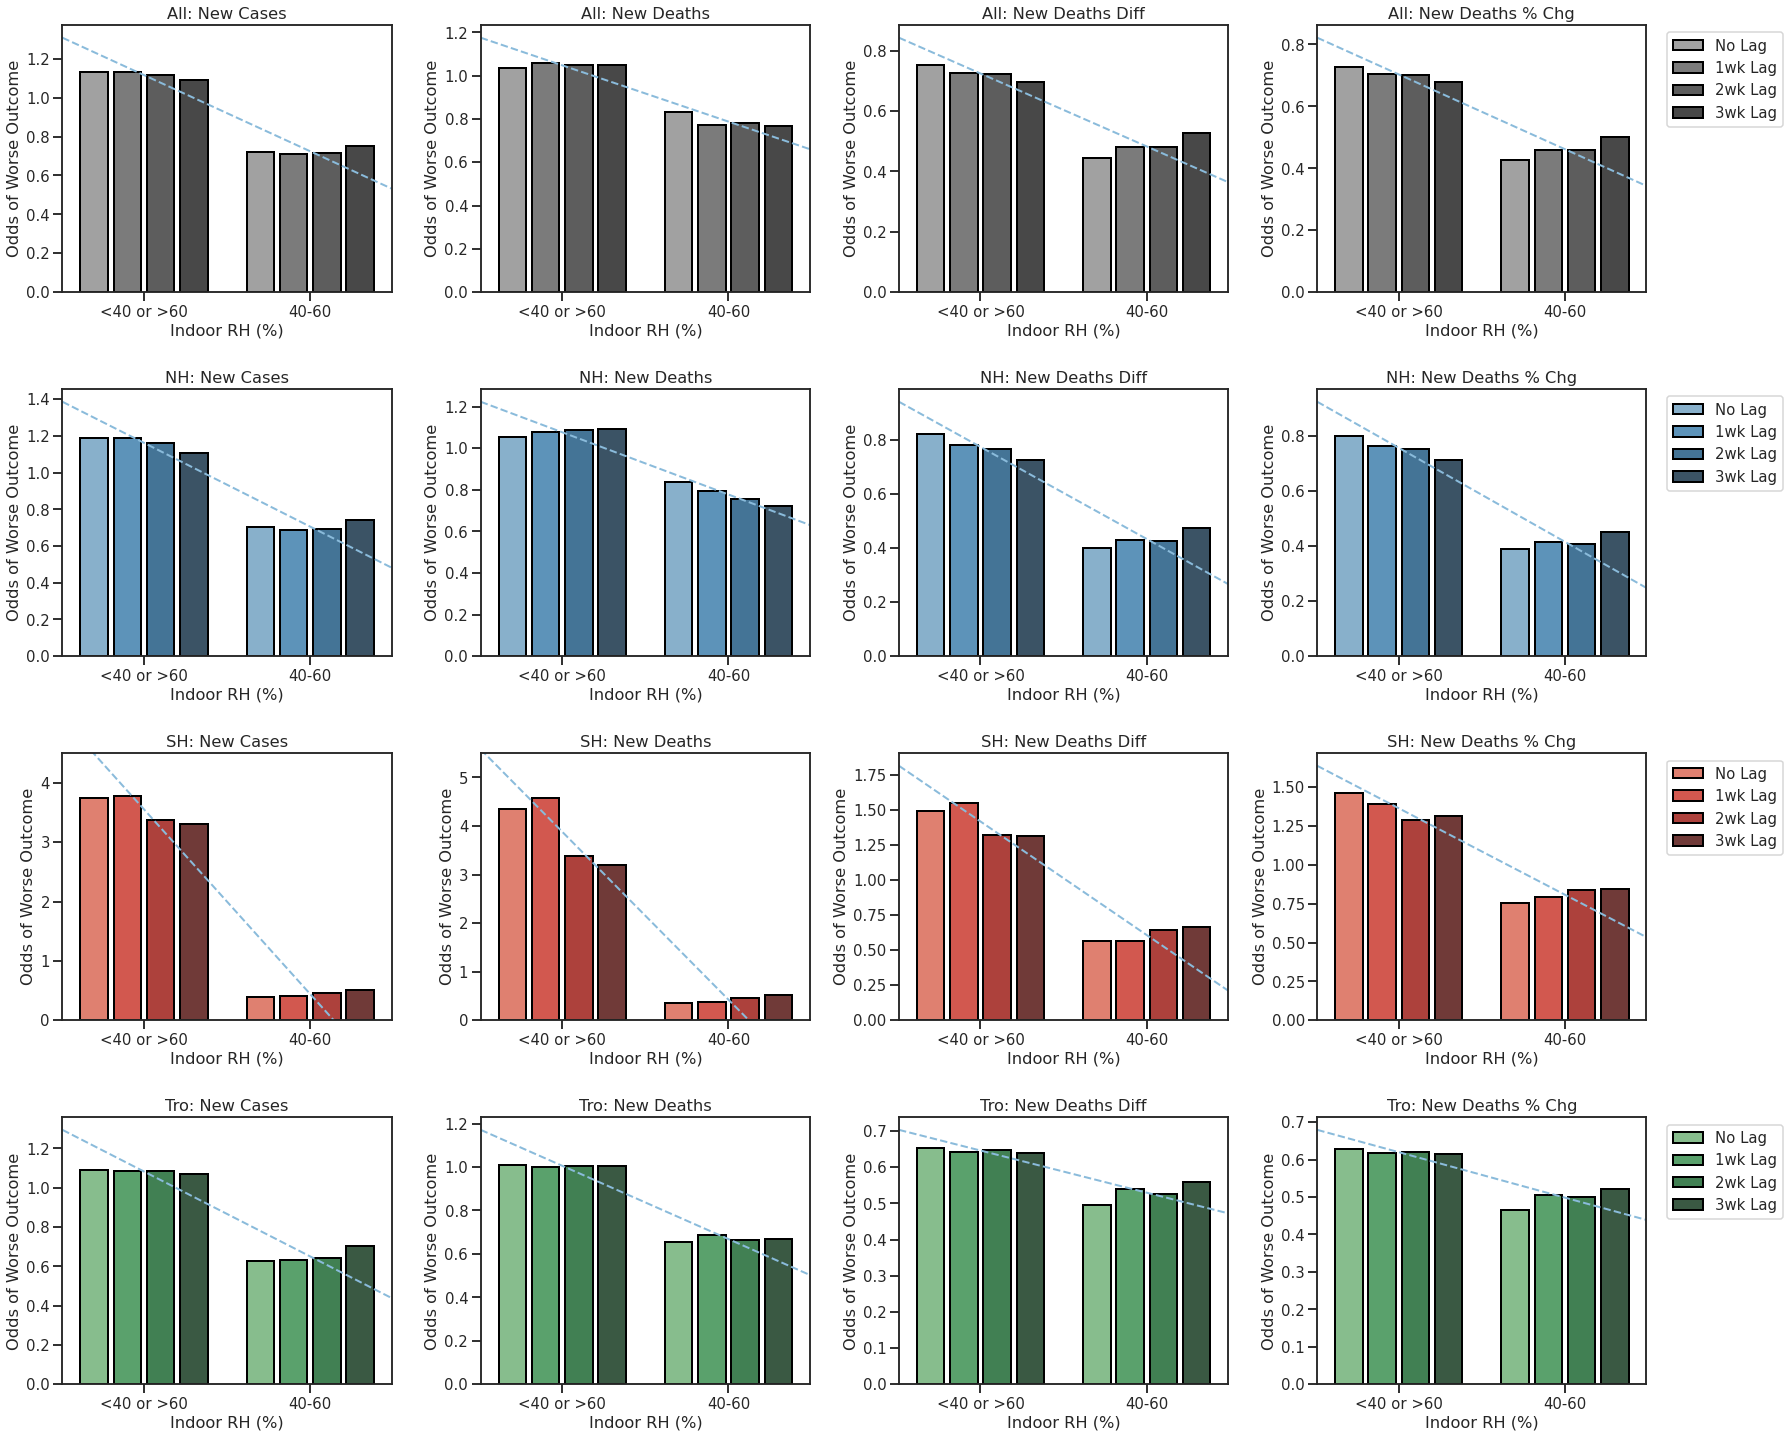

In [ ]:
df_ORs_byregion_reindex = df_ORs_byregion.reset_index() # Reset index to get rid of multi-index 


# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
rows = 4; cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(25,20))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols): 



  # All countries colored bar plots and best fit 
  data_to_plot = df_ORs_byregion_reindex[(df_ORs_byregion_reindex['level_0']==quantized_outcomes[col]) & (df_ORs_byregion_reindex['level_2']=='All')]
  a = data_to_plot.drop(columns='oddsbad_WITH_treatment'); b = data_to_plot.drop(columns='oddsbad_NO_treatment');  c = pd.concat([a,b])
  c['odds_of_bad_outcome'] = c['oddsbad_NO_treatment'].fillna(0) + c['oddsbad_WITH_treatment'].fillna(0); c['treatment'] = [0,0,0,0,1,1,1,1]
  sns.barplot(x='treatment',y='odds_of_bad_outcome',hue='level_1',data=c,ax=ax[0,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greys_d',n_colors=4))
  sns.regplot(x='treatment',y='odds_of_bad_outcome',data=c,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[0,col],truncate=False)

  # Northern hemisphere colored bar plots and best fit 
  data_to_plot = df_ORs_byregion_reindex[(df_ORs_byregion_reindex['level_0']==quantized_outcomes[col]) & (df_ORs_byregion_reindex['level_2']=='NH')]
  a = data_to_plot.drop(columns='oddsbad_WITH_treatment'); b = data_to_plot.drop(columns='oddsbad_NO_treatment');  c = pd.concat([a,b])
  c['odds_of_bad_outcome'] = c['oddsbad_NO_treatment'].fillna(0) + c['oddsbad_WITH_treatment'].fillna(0); c['treatment'] = [0,0,0,0,1,1,1,1]
  sns.barplot(x='treatment',y='odds_of_bad_outcome',hue='level_1',data=c,ax=ax[1,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Blues_d',n_colors=4))
  sns.regplot(x='treatment',y='odds_of_bad_outcome',data=c,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[1,col],truncate=False)

  # Southern hemisphere colored bar plots and best fit 
  data_to_plot = df_ORs_byregion_reindex[(df_ORs_byregion_reindex['level_0']==quantized_outcomes[col]) & (df_ORs_byregion_reindex['level_2']=='SH')]
  a = data_to_plot.drop(columns='oddsbad_WITH_treatment'); b = data_to_plot.drop(columns='oddsbad_NO_treatment');  c = pd.concat([a,b])
  c['odds_of_bad_outcome'] = c['oddsbad_NO_treatment'].fillna(0) + c['oddsbad_WITH_treatment'].fillna(0); c['treatment'] = [0,0,0,0,1,1,1,1]
  sns.barplot(x='treatment',y='odds_of_bad_outcome',hue='level_1',data=c,ax=ax[2,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Reds_d',n_colors=4))
  sns.regplot(x='treatment',y='odds_of_bad_outcome',data=c,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[2,col],truncate=False)

  # Tropical colored bar plots and best fit
  data_to_plot = df_ORs_byregion_reindex[(df_ORs_byregion_reindex['level_0']==quantized_outcomes[col]) & (df_ORs_byregion_reindex['level_2']=='Tro')]
  a = data_to_plot.drop(columns='oddsbad_WITH_treatment'); b = data_to_plot.drop(columns='oddsbad_NO_treatment');  c = pd.concat([a,b])
  c['odds_of_bad_outcome'] = c['oddsbad_NO_treatment'].fillna(0) + c['oddsbad_WITH_treatment'].fillna(0); c['treatment'] = [0,0,0,0,1,1,1,1]
  sns.barplot(x='treatment',y='odds_of_bad_outcome',hue='level_1',data=c,ax=ax[3,col],capsize=.05,errwidth=2,edgecolor='black',linewidth=2,palette=sns.color_palette(palette='Greens_d',n_colors=4))
  sns.regplot(x='treatment',y='odds_of_bad_outcome',data=c,ci=None,line_kws={'linestyle': '--','linewidth':2},scatter=False,ax=ax[3,col],truncate=False)


ax[2,0].set_ylim(0,4.5); ax[2,1].set_ylim(0,5.5)

# Define custom plotting legends 
# Remove legends in the first 3 plots for all 3 rows 
[ax[r,c].get_legend().remove() for r in np.arange(0,4) for c in np.arange(0,3)] 

# Get handles and labels information for the legend, then use these same handles and specify custom label names and custom label location in the subsequent line
handles, labels = ax[0,3].get_legend_handles_labels(); ax[0,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[1,3].get_legend_handles_labels(); ax[1,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[2,3].get_legend_handles_labels(); ax[2,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure
handles, labels = ax[3,3].get_legend_handles_labels(); ax[3,3].legend(handles, ['No Lag','1wk Lag','2wk Lag','3wk Lag'],bbox_to_anchor=(1.04,1), loc="upper left") # Rename the legend labels and place it outside of the figure

# # Define ylabels 
[ax.set_ylabel('Odds of Worse Outcome') for ax in plt.gcf().axes]

# [ax[r,0].set_ylabel('Q Frequency: New Cases') for r in np.arange(0,4)]; 
# [ax[r,1].set_ylabel('Q Frequency: New Deaths') for r in np.arange(0,4)]
# [ax[r,2].set_ylabel('Q Freq: New Deaths Diff') for r in np.arange(0,4)]; 
# [ax[r,3].set_ylabel('Q Freq: New Deaths % Change') for r in np.arange(0,4)]

ax[0,0].set_title('All: New Cases')
ax[1,0].set_title('NH: New Cases')
ax[2,0].set_title('SH: New Cases')
ax[3,0].set_title('Tro: New Cases')

ax[0,1].set_title('All: New Deaths')
ax[1,1].set_title('NH: New Deaths')
ax[2,1].set_title('SH: New Deaths')
ax[3,1].set_title('Tro: New Deaths')

ax[0,2].set_title('All: New Deaths Diff')
ax[1,2].set_title('NH: New Deaths Diff')
ax[2,2].set_title('SH: New Deaths Diff')
ax[3,2].set_title('Tro: New Deaths Diff')

ax[0,3].set_title('All: New Deaths % Chg')
ax[1,3].set_title('NH: New Deaths % Chg')
ax[2,3].set_title('SH: New Deaths % Chg')
ax[3,3].set_title('Tro: New Deaths % Chg')

# Define xlabels
[ax.set_xlabel('Indoor RH (%)') for ax in plt.gcf().axes]

# Define xticks
[ax.set_xticklabels(['<40 or >60','40-60'])for ax in plt.gcf().axes]

# # Define titles
# [ax[0,c].set_title('All Countries') for c in np.arange(0,4)]
# [ax[1,c].set_title('N. Hemisphere Countries') for c in np.arange(0,4)]
# [ax[2,c].set_title('S. Hemisphere Countries') for c in np.arange(0,4)]
# [ax[3,c].set_title('Tropical Countries') for c in np.arange(0,4)]

[change_width(ax, 0.165) for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=2,w_pad=1.5)

from google.colab import files
filename = ('Figure_OddsOfWorseOutcome_All_NH_SH_Trop.png')
fig.savefig(filename, dpi=500)
files.download(filename) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

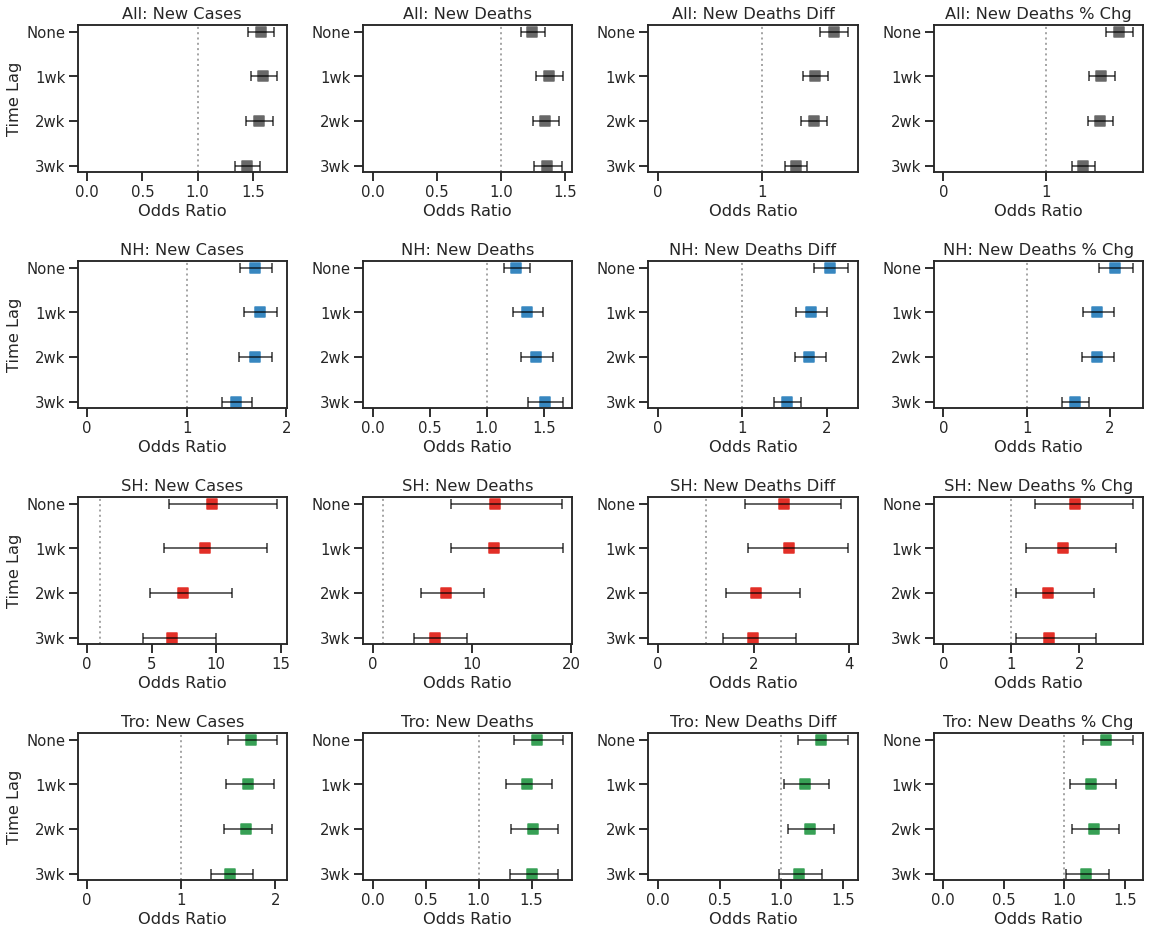

In [ ]:

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

#color_array = ['Greys_d','Blues_d','Reds_d','Greens_d']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))

points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      
      # if region == 'All':
      #   color = sns.color_palette(palette='Greys_d',n_colors=1)
      # elif region == 'NH':
      #   color = sns.color_palette(palette='Blues_d',n_colors=1)
      # elif region == 'SH':
      #   color = sns.color_palette(palette='Reds_d',n_colors=1)
      # elif region == 'Tro':
      #   color = sns.color_palette(palette='Greens_d',n_colors=1)

      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      #lines.append(ax[region,col].plot([data_for_plotting['LCL'],data_for_plotting['UCL']],[lag,lag],color='k',alpha=0.6))
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases')
ax[1,0].set_title('NH: New Cases')
ax[2,0].set_title('SH: New Cases')
ax[3,0].set_title('Tro: New Cases')

ax[0,1].set_title('All: New Deaths')
ax[1,1].set_title('NH: New Deaths')
ax[2,1].set_title('SH: New Deaths')
ax[3,1].set_title('Tro: New Deaths')

ax[0,2].set_title('All: New Deaths Diff')
ax[1,2].set_title('NH: New Deaths Diff')
ax[2,2].set_title('SH: New Deaths Diff')
ax[3,2].set_title('Tro: New Deaths Diff')

ax[0,3].set_title('All: New Deaths % Chg')
ax[1,3].set_title('NH: New Deaths % Chg')
ax[2,3].set_title('SH: New Deaths % Chg')
ax[3,3].set_title('Tro: New Deaths % Chg')

# [ax[0,c].set_title('All Countries') for c in np.arange(0,4)]
# [ax[1,c].set_title('N. Hem Countries') for c in np.arange(0,4)]
# [ax[2,c].set_title('S. Hem Countries') for c in np.arange(0,4)]
# [ax[3,c].set_title('Trop. Countries') for c in np.arange(0,4)]

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]

[ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1.5,w_pad=1)

from google.colab import files
filename = ('Figure_OddsRatios_All_NH_SH_Trop.png')
fig.savefig(filename, dpi=500)
files.download(filename) 